In [2]:
# Alle notwendigen Import werden Hier gemacht

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Methode zum Einlesen der Daten und Berechnen der Laufszeiten.

def read_and_compute_runtime(filename):
    df = pd.read_csv(filename, sep=r"\s+", header=None,
                     names=["id", "start", "pre_end", "solver_end"])

    time_format = "%d.%m.%Y-%H:%M:%S"
    df["start"] = pd.to_datetime(df["start"], format=time_format)
    df["solver_end"] = pd.to_datetime(df["solver_end"], format=time_format)
    df["runtime_s"] = (df["solver_end"] - df["start"]).dt.total_seconds()

    return df

# r1=read_and_compute_runtime("runtimes.mp80")
#print(r1)


In [66]:
#Methode read_and_compute_runtime aufrufen, Laufzeiten, Mittelwerte, Varianz , median und standardabweichungen  von Jede Prozessor berechnen
# und in einem DataFrame (~ Dictionary ) speichern 

files = {
    "Intel N95 (mp80)": "runtimes.mp80",
    "Intel N100": "runtimes.n100",
    "Raspberry Pi 5": "runtimes.pi5"
}

data = {name: read_and_compute_runtime(path) for name, path in files.items()}
#print(data)

results=[]
for name, df in data.items():
    mean = df["runtime_s"].mean()
    median = df["runtime_s"].median()
    var = df["runtime_s"].var()
    std = df["runtime_s"].std()
    max=df["runtime_s"].max()
    min=df["runtime_s"].min()
    
    
    results.append({'Name': name,'Mean': mean,'Median': median,'Standardabweichung': std, 'MinZeit (in Sekunden)': min,'MaxZeit(in Sekunden': max})

# jetz als DataFrame umwandeln
mmvs_df = pd.DataFrame(results)

#print(mmvs_df)

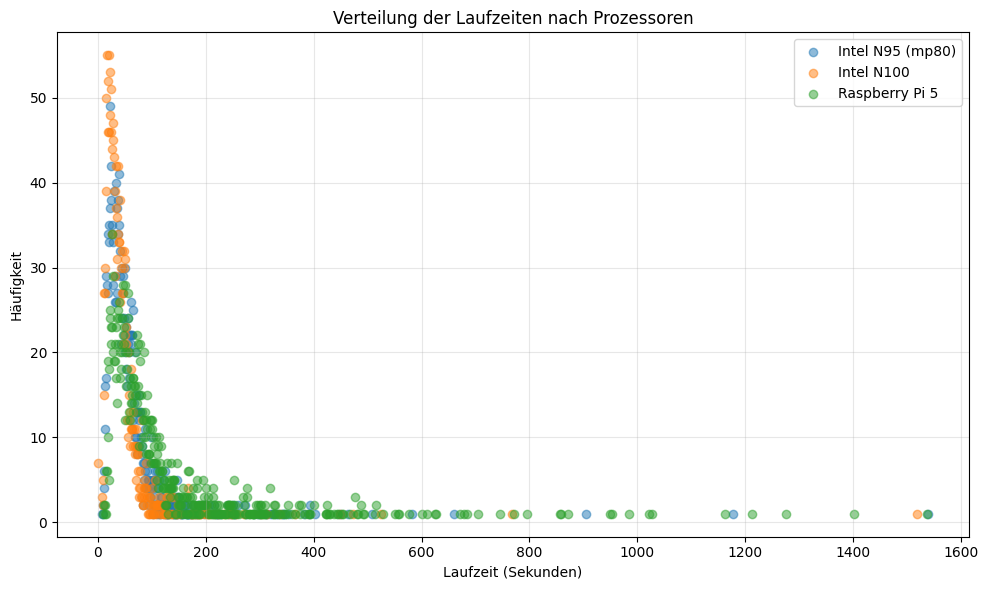

In [6]:
plt.ion()
plt.figure(figsize=(10, 6))

counts_dict = {}
for name, df in data.items():
    
    runtimes_rounded = df["runtime_s"] #.round(1)
    counts = runtimes_rounded.value_counts().sort_index()
    counts_dict[name]=counts
    counts = counts[(counts.index >= 0) & (counts.index <= 2000)]
    counts=counts[(counts.values>=0 )& (counts.values<=250)]
    plt.scatter(counts.index,counts.values , label=name,alpha=0.5)
    #plt.plot(counts.index, counts.values, label=name)
    
plt.xlabel("Laufzeit (Sekunden)")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Laufzeiten nach Prozessoren")
#plt.xlim(-10, 600)
#plt.ylim(-10, 80)
plt.legend()
plt.legend()
plt.tight_layout()
plt.savefig("runtime_distribution111.png") 
plt.grid(True, alpha=0.3)
plt.show()

counts_df=pd.DataFrame(counts_dict); counts_df = counts_df.fillna(0) # Laufzeiten und deren Haufigken in einem DataFrame gespeichert.
#print(counts_df)

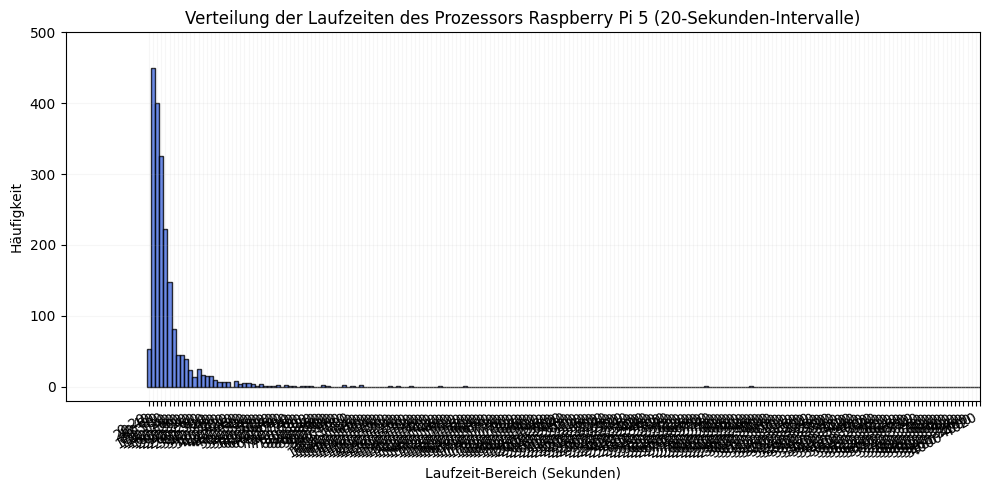

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_Pi5 = data["Raspberry Pi 5"]
runtimes = df_Pi5["runtime_s"]

# 20-Sekunden-Intervalle
bins = np.arange(0, runtimes.max() + 20, 20)

# In Intervalle einteilen
categories = pd.cut(runtimes, bins=bins, right=True)

# Häufigkeit zählen
counts = categories.value_counts().sort_index()

# Labels schöner machen ([a, b])
labels = [f"{int(c.left)}-{int(c.right)}" for c in counts.index]

plt.figure(figsize=(10,5))
plt.bar(labels, counts.values, color="royalblue", edgecolor="black", width=1.0, alpha=0.8)

plt.xlabel("Laufzeit-Bereich (Sekunden)")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Laufzeiten des Prozessors Raspberry Pi 5 (20-Sekunden-Intervalle)")
plt.xticks(rotation=30, ha="right")

# Fokus auf Hauptbereich
plt.ylim(-20, 500)
plt.xlim(-20, 200)  # Zoom auf 0–200 Sekunden
plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()


In [64]:
print(runtimes)

0       65.0
1       54.0
2       33.0
3       61.0
4       67.0
        ... 
1995    40.0
1996    68.0
1997    52.0
1998    79.0
1999    25.0
Name: runtime_s, Length: 2000, dtype: float64


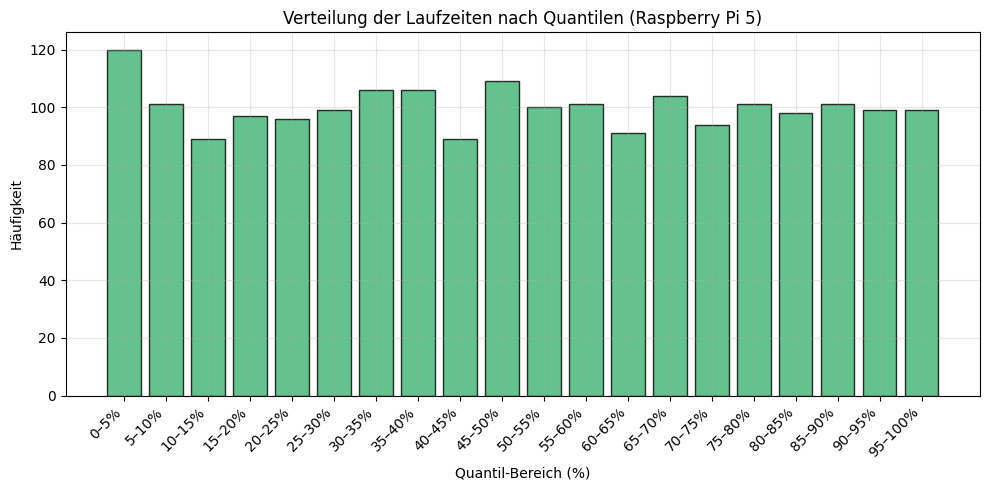

In [71]:

# Definiere Quantilgrenzen: 0%, 5%, 10%, ..., 100%
quantile_edges = np.linspace(0, 1, 21)  # 20 Bereiche à 5%
bins = np.quantile(runtimes, quantile_edges)

# In Quantilbereiche einteilen
categories = pd.cut(runtimes, bins=bins, include_lowest=True, duplicates="drop")

# Häufigkeit pro Quantilbereich zählen
counts = categories.value_counts().sort_index()

# Labels im Format „0–5%“, „5–10%“ usw.
labels = [f"{int(left*100)}–{int(right*100)}%" for left, right in zip(quantile_edges[:-1], quantile_edges[1:])]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(labels[:len(counts)], counts.values, color="mediumseagreen", edgecolor="black", alpha=0.8)

plt.xlabel("Quantil-Bereich (%)")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Laufzeiten nach Quantilen (Raspberry Pi 5)")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


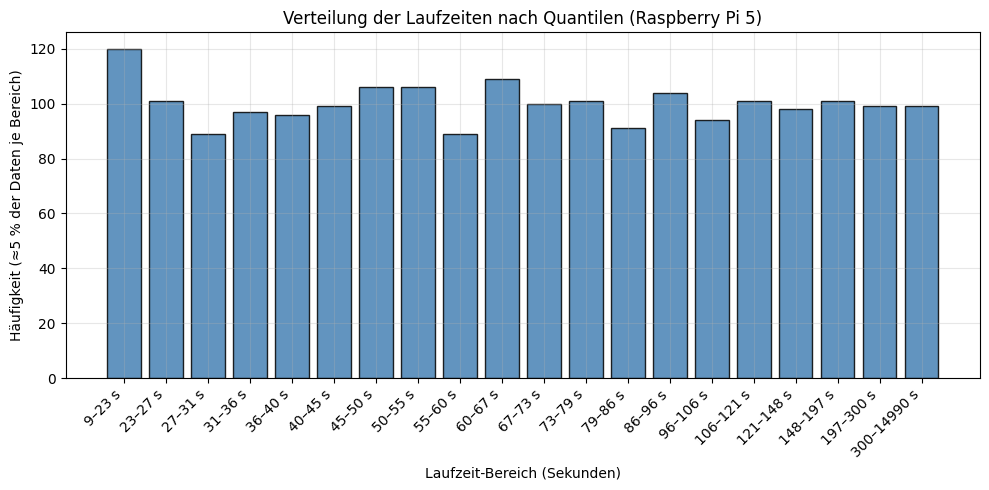

In [72]:

# Anzahl Quantil-Bereiche (z. B. 20 Bereiche à 5 %)
n_bins = 20
quantile_edges = np.linspace(0, 1, n_bins + 1)
bins = np.quantile(runtimes, quantile_edges)

# In Quantil-Bereiche einteilen (duplikate entfernen, falls nötig)
categories = pd.cut(runtimes, bins=bins, include_lowest=True, duplicates="drop")

# Häufigkeit pro Bereich zählen
counts = categories.value_counts().sort_index()

# Labels im Format "a–b s"
labels = [f"{int(interval.left)}–{int(interval.right)} s" for interval in counts.index]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(labels, counts.values, color="steelblue", edgecolor="black", alpha=0.85)

plt.xlabel("Laufzeit-Bereich (Sekunden)")
plt.ylabel("Häufigkeit (≈5 % der Daten je Bereich)")
plt.title("Verteilung der Laufzeiten nach Quantilen (Raspberry Pi 5)")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


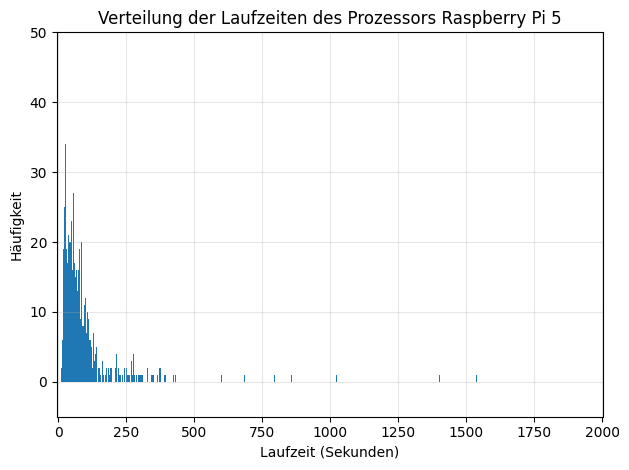

In [36]:
import matplotlib.pyplot as plt

# Arrondir les valeurs de temps d'exécution (optionnel)
runtimes_rounded = df_Pi5["runtime_s"].round(1)

# Compter les occurrences de chaque valeur et trier
counts = runtimes_rounded.value_counts().sort_index()
# Créer l’histogramme à partir des valeurs
plt.bar(counts.index, counts.values, width=1, alpha=1)

# Ajouter les labels et le titre
plt.xlabel("Laufzeit (Sekunden)")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Laufzeiten des Prozessors Raspberry Pi 5")

# Limites optionnelles
plt.xlim(-5, 2000)
plt.ylim(-5, 50)

#plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("runtime_distribution111.png", dpi=300)
plt.show()
